# Homework 3: Stochastic Gradient Descent and Logistic Regression
***

**Name**: Brennon Lee

***

This assignment is due on Moodle by **5pm on Tuesday March 6th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/CSCI-4622-Machine-Learning/blob/master/resources/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [6]:
import pickle, gzip
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

### [25 points] Problem 1 - MLE and SGD for the Exponential Distribution Rate Parameter
***

Suppose you're given $n$ numbers $x_1, x_2, \ldots, x_n$ (think training data) and told that they're samples from the exponential distribution $Exp(\lambda)$ where the rate parameter $\lambda$ is unknown. Recall that the probability density function for $Exp(\lambda)$ is given by  

$$
f_\lambda(x) = \left\{
\begin{array}{rl}
0 & \textrm{if } x < 0 \\
\lambda e^{-\lambda x} & \textrm{if } x \geq 0
\end{array}
\right.
$$

In this problem we'll use Maximum Likelihood Estimation to estimate the rate parameter by hand and with Stochastic Gradient Descent. 

**Part A**: Write down the likelihood function $L(\lambda)$ for the data set $x_1, x_2, \ldots, x_n$. 

###### Our likelihood function $L(\lambda)$ can be written as follows: 
$$L(\lambda \ | \ x_{1} . . . x_{n}) = \prod_{i=1}^{n} f_{\lambda}(x_{i} \ | \ \lambda)$$

$$ =\prod_{i=1}^{n} \lambda e^{-\lambda x_{i}} $$

$$ \boxed{= \lambda^n e^{-\lambda \cdot \sum_{i=1}^{n} x_{i}}}$$

**Part B**: Write down the associated Negative Log-Likelihood $\textrm{NLL}(\lambda)$ and simplify it algebraically. 

$$NLL(\lambda) = -log(\lambda^n e^{-\lambda \sum_{i=1}^{n} x_{i}})$$

Simplifying using log properties:

$$= -log(\lambda^n) - log(e^{-\lambda \sum_{i=1}^{n} x_{i}})$$

$$\boxed{ = -n \cdot log(\lambda) + \lambda \sum_{i=1}^{n} x_{i}}$$

**Part C**: Find a formula for the MLE of the rate parameter $\lambda$ by taking the derivative of $\textrm{NLL}(\lambda)$, setting it equal to zero, and solving for $\hat{\lambda}$. 

$$\frac{dNLL(\lambda)}{d\lambda} = \frac{-n}{\lambda} + \sum_{i=1}^{n}x_{i}$$

$$\frac{-n}{\lambda} + \sum_{i=1}^{n}x_{i} = 0$$

$$\sum_{i=1}^{n}x_{i} = \frac{n}{\lambda}$$

$$\boxed{\hat{\lambda} = \frac{n}{\sum_{i=1}^{n}x_{i}}}$$

**Part D**: Use the formula you found in **Part C** to estimate the rate parameter $\lambda$ for the following training data.  

In [8]:
lam = 3.0; x_train = np.random.exponential(1/lam, size=10) # Note: numpy's exponential sampler expects 1 over rate parameter

In [9]:
lamhat = x_train.shape[0] / np.sum(x_train)
print("MLE for Lambda = {:.3f}".format(lamhat))

MLE for Lambda = 2.849


**Part E**: Describe a **Stochastic** Gradient Descent algorithm based on the $\textrm{NLL}$ you found in **Part B**. **Hint**: Think of what the loss function would be if the training set contained just a single point. 

**Part F**: Implement the scheme described in **Part E** and run it on your training set.  Does it converge to the MLE that you found in **Part D**? 

### [20 points] Problem 2 - Regularized Logistic Regression Intuition 
***

Consider the training set shown below where red dots correspond to training examples with label $y=1$ and blue dots correspond to training examples with label $y = 0$. Suppose you fit a logistic regression model of the form 

$$
p(y = 1 \mid {\bf x}) = \textrm{sigm}(\beta_0 + \beta_1 x_1 + \beta_2 x_2) = \dfrac{1}{1 + \exp(-\boldsymbol{\beta}^T{\bf x})}
$$

where here in $\boldsymbol{\beta}^T{\bf x}$ the vector ${\bf x}$ has had a $1$ prepended so that it looks like ${\bf x} = (1, x_1, x_2)$. 

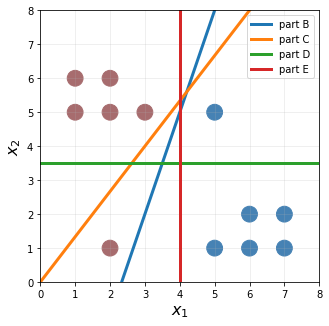

In [36]:
X = np.array([[1,2,1], [1,1,5], [1,2,5], [1,3,5], [1,1,6], [1,2,6], [1,5,1], [1,6,1], [1,7,1], [1,6,2], [1,7,2], [1,5,5]], dtype=float)
y = np.array([1 if ii < 6 else 0 for ii in range(X.shape[0])], dtype=float)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.scatter(X[:,1], X[:,2], color=["#a76c6e" if ii < 6 else "steelblue" for ii in range(X.shape[0])], s=250)
ax.plot([0,5], [-7,8], lw=3, label="part B") # no restrictions / regularization
ax.plot([0,6], [0,8], lw=3, label="part C") # beta_0 is zero
ax.plot([0,8], [3.5,3.5], lw=3, label="part D") # beta_1 is zero
ax.plot([4,4], [0,8], lw=3, label="part E") # TODO 
ax.grid(alpha=0.25); ax.set_xlim([0,8]); ax.set_ylim([0,8]); ax.set_xlabel(r"$x_1$", fontsize=16); ax.set_ylabel(r"$x_2$", fontsize=16)
ax.legend(loc="upper right");

**Part A**: Suppose you use the the standard Logistic Regression decision rule such that a query point ${\bf x}$ is predicted to be $\hat{y} = 1$ if $p(y = 1 \mid {\bf x}) \geq 0.5$ and $\hat{y} = 0$ otherwise. Describe the decision boundary of such a classifier.  How could you plot the decision boundary in a 2D feature space like the one shown above?  

###### The general formula for a decision boundary in a 2d feature space is: $$x_{2} = \frac{-\beta_{0}}{\beta_{2}} - \frac{\beta_{1}}{\beta_{2}} \cdot x_{1}$$

**Part B**: Suppose you learn a Logistic Regression classifier from this training set by minimizing the negative log-likelihood 

$$
NLL(\boldsymbol{\beta}) = -\displaystyle\sum_{i=1}^n \left[y_i \log \textrm{sigm}(\boldsymbol{\beta}^T{\bf x})       + (1-y_i)\log(1 - \textrm{sigm}(\boldsymbol{\beta}^T{\bf x}))\right]
$$

Describe a possible decision boundary that you could learn as a result.  Plot the decision boundary on the graph above and label it "part B". How many training examples does your learned decision boundary misclassify? 

##### A possible decision boundary could be one that splits the points with a linear line like shown above (where none of the points are misclassified). This is where our linear line has our learned $\beta$ values after learning our Logistic Regression classifier.

**Part C**: Suppose you learn a Logistic Regression classifier from this training set by minimizing the negative log-likelihood with the parameter $\beta_0$ so strongly regularized that it approaches zero, and the other parameters unregularized.  

$$
\textrm{Loss}(\boldsymbol{\beta}) = NLL(\boldsymbol{\beta})+ \lambda \beta_0^2
$$

Describe a possible decision boundary that you could learn as a result.  Plot the decision boundary on the graph above and label it "part C". How many training examples does your learned decision boundary misclassify? 

##### Since $\beta_{0}$ is now zero, there is no y-intercept on our graph and our decision boundary line must intersect the origin. Our slope may still vary and can look like the line on our graph. Notice one of our red points has been misclassified.

**Part D**: Suppose you learn a Logistic Regression classifier from this training set by minimizing the negative log-likelihood with the parameter $\beta_1$ so strongly regularized that it approaches zero, and the other parameters unregularized.  

$$
\textrm{Loss}(\boldsymbol{\beta}) = NLL(\boldsymbol{\beta})+ \lambda \beta_1^2
$$

Describe a possible decision boundary that you could learn as a result.  Plot the decision boundary on the graph above and label it "part D". How many training examples does your learned decision boundary misclassify? 

##### Now that $\beta_{1}$ is zero, this means our decision boundary has a slope of zero. However, our y-intercept can be shifted along the y-axis and look like the example on our graph. Notice two points are miscliassifed . . . one red and one blue point.

**Part E**: Suppose you learn a Logistic Regression classifier from this training set by minimizing the negative log-likelihood with the parameter $\beta_2$ so strongly regularized that it approaches zero, and the other parameters unregularized.  

$$
\textrm{Loss}(\boldsymbol{\beta}) = NLL(\boldsymbol{\beta})+ \lambda \beta_2^2
$$

Describe a possible decision boundary that you could learn as a result.  Plot the decision boundary on the graph above and label it "part E". How many training examples does your learned decision boundary misclassify? 

###### If $\beta_{2}$ is approaching zero, our $\beta_{0}$ and $\beta_{1}$ are going to blow up to $+\infty$. This will give us a veritcal decision boundary line. Notice that no points are misclassfied for this line.

### [30 points] Problem 3: SGD for Regularized Logistic Regression 
***

In this problem you'll implement a Logistic Regression class that trains a classifier using Stochastic Gradient Descent with $\ell_2$-Regularization. In Problem 4 you'll use this class to do document classification. Here your job will be to implement the following methods: 

- `train`: Takes in learning rate, regularization strength, and number of epochs to do, and learns model parameters using SGD 
- `predict`: Takes in a matrix of examples and predicts binary labels in $\{0,1\}$
- `accuracy`: Takes in a matrix of examples and true labels, makes predictions, and returns accuracy as value in $[0,1]$ 

Note that you should assume that all features have been prepended with a $1$ so that each example is the same length as the parameter vector `beta`. 

There are some optional methods that you may implement if you like which might make your life easier in later problems.  These will not be unit-tested or graded though.  They are 

- `predict_proba`: Takes in a matrix of examples and estimates $p(y=1 \mid {\bf x})$ for each example. 
- `mean_loss`: Takes in a matrix of examples and true labels and evaluates the negative log-likelihood  

Finally, the method `best_text_features` will not be needed until **Problem 4**. 

The section below the class skeleton contains more details as well as unit tests. Note that the unit tests are based on a subset of the toy data in **Problem 2**.  

In [12]:
class LogReg:
    """
    Class to train a logistic regression classifier on the training data
    """
    
    def __init__(self, X_train, y_train, X_valid=None, y_valid=None):
        """
        Initialize classifier 
        
        :param X_train: ndarray of training features (with column of 1s prepended)
        :param y_train: ndarray of training labels {0,1}
        :param X_valid: ndarray of validation features (with column of 1s prepended)
        :param y_valid: ndarray of validation labels {0,1}
        """
        
        self.X_train = X_train 
        self.y_train = y_train 
        
        self.X_valid = X_valid 
        self.y_valid = y_valid 
        
        # Array of logistic regression weights 
        self.beta = np.random.randn(self.X_train.shape[1])
        
        # list for storing loss function histories 
        self.train_history = [] 
        self.valid_history = [] 
        
    @staticmethod
    def sigmoid(z, threshold=20):
        """
        Evaluate the sigmoid function 
        :param z: argument of sigmoid function 
        :param threshold: threshold parameter to prevent over/underflow 
        """
        
        if np.abs(z) > threshold:
            z = np.sign(z) * threshold
            
        return 1.0 / (1 + np.exp(-z))
    
    def train(self, eta=0.01, lam=0.0, num_epochs=10):
        """
        train LogReg model using SGD with regularization 
        
        :param eta: the learning rate 
        :param lam: the regularization strength
        :param num_epochs: number of epochs to perform in training 
        :return : returns nothing, just updates weights
        """
        
        for ee in range(0, num_epochs): # Loop through all epochs
            
            shuffled_inds = list(range(self.X_train.shape[0]))
            np.random.shuffle(shuffled_inds)
            
            counter = 0
            for ii in shuffled_inds: # Loop through shuffeled training data indices
                counter += 1
                if counter % 50 == 0: # every 50 training examples, get the accuracy
                    self.train_history.append(self.accuracy(self.X_train, self.y_train))
                    self.valid_history.append(self.accuracy(self.X_valid, self.y_valid))
                sigII = self.sigmoid(np.dot(self.beta, self.X_train[ii])) - self.y_train[ii]
                for k in range(0, self.beta.shape[0]): # Loop through each feature
                    if k == 0:
                        self.beta[0] -= eta * sigII
                    else:
                        self.beta[k] -= eta * (sigII * self.X_train[ii, k] + (2*lam*self.beta[k]))
        
    def predict_proba(self, X):
        """
        predict probability p(y = 1 | x) for each row of X (this function is optional)
        
        :param X: ndarray of features 
        :return : ndarray of probabilities 
        """
        probs = np.zeros(X.shape[0])
        for i,v  in enumerate(X):
            probs[i] = self.sigmoid(np.dot(self.beta, v))
        return probs
    
    def predict(self, X):
        """
        predict binary labels {0,1} for each row of X
        
        :param X: ndarray of features 
        :return: ndarray of binary labels {0,1}
        """
        probs = self.predict_proba(X)
        labels = [1 if prob >= 0.5 else 0 for prob in probs]
        return labels
    
    def accuracy(self, X, y):
        """
        report accuracy of prediction
        
        :param X: ndarray of features 
        :param y: associated true labels
        :return: accuracy as a float in [0.0,1.0]
        """
        correct = 0.0
        predict_labels = self.predict(X)
        for ii in range(0,len(y)):
            if predict_labels[ii] == y[ii]:
                correct += 1.0
        return correct / len(y)
    
    def mean_loss(self, X, y):
        """
        report mean log-likelihood (this function is optional)
        
        :param X: ndarray of features 
        :param y: associated true labels
        :return: average log-likelihood
        """
        from sklearn.metrics import log_loss
        return 0.0
    
    def best_text_features(self, vocab):
        """
        Print 10 best features for each class 
        
        :param vocab: list of vocab words
        :return: returns nothing 
        """
        class0 = self.beta.argsort()[:10] # Sort self.beta to get min values
        class1 = np.argpartition(self.beta, -10)[-10:] # Sort self.beta to get max values
        print("\nbest words for class 0")
        print("----------------------")
        for ind in class0:
            print(vocab[ind])

        print("\nbest words for class 1")
        print("----------------------")
        for ind in class1:
            print(vocab[ind])
        
        

**Part A**: Implement the `train` method so that it performs **unregularized** SGD updates of the model parameters by minimizing the negative log-likelihood loss function discussed in lecture:  

$$
\textrm{NLL}({\bf \beta}) = -\displaystyle\sum_{i=1}^n \left[y_i \log \textrm{sigm}(\boldsymbol{\beta}^T{\bf x})       + (1-y_i)\log(1 - \textrm{sigm}(\boldsymbol{\beta}^T{\bf x}))\right] 
$$


Note that your SGD updates should be vectorized, utilize Numpy routines as much as possible, and not make any assumptions about the number of features. When you think you're done, execute the following code cell to perform three unit tests. 

In [44]:
%run -i tests/new_tests.py "prob 3A"

testPosUnregUpdate (__main__.TestLogReg) ... ok
testNegUnregUpdate (__main__.TestLogReg) ... ok
testShuffelUnregUpdate (__main__.TestLogReg) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.007s

OK


**Part B**: Update your implementation of the `train` method so that it performs **regularized** SGD updates of the model parameters to minimize the regularized loss function discussed in lecture

$$
\textrm{Loss}({\bf \beta}) = -\displaystyle\sum_{i=1}^n \left[y_i \log \textrm{sigm}(\boldsymbol{\beta}^T{\bf x})       + (1-y_i)\log(1 - \textrm{sigm}(\boldsymbol{\beta}^T{\bf x}))\right] + \lambda\displaystyle\sum_{k=1}^p \beta_k^2
$$

Note that you should **NOT** regularize the bias parameter $\beta_0$. When you think you're done, execute the following code cell to perform two unit tests. 

In [85]:
%run -i tests/new_tests.py "prob 3B"

testPosRegUpdate (__main__.TestLogReg) ... ok
testNegRegUpdate (__main__.TestLogReg) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


**Part C**: Implement the `predict` function to take a matrix of examples and use the learned parameters to return a vector of predictions of $\{0,1\}$ for each example. When you think you're done, execute the following code cell to perform one unit test. 


In [86]:
%run -i tests/new_tests.py "prob 3C"

testPredict (__main__.TestLogReg) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


**Part D**: Implement the `accuracy` method to take a matrix of examples and a vector of true labels, make predictions, and return the accuracy of those predictions as a decimal value in $[0,1]$. Execute the following code cell to perform one final unit tests. 


In [87]:
%run -i tests/new_tests.py "prob 3D"

testAccuracy (__main__.TestLogReg) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


### [25 points] Problem 4: Baseball vs Hockey 
***

In this problem you will train a Logistic Regression classifier to determine if a document is talking about baseball or hockey. The following code cell will load training and validation sets, as well as a list that encodes the map from feature index to particular words.  

In [8]:
f = gzip.open("data/baseball_hockey.pklz", 'rb')
X_train, y_train, X_valid, y_valid, vocab = pickle.load(f)
f.close()

**Part A**: Look at the encoded features in `X_train` or `X_valid`.  Which of the text models discussed in class do these features represent? Briefly justify your response. 

In [78]:
print(X_valid[:,1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

###### The `X_valid` data looks like it is a sparse matrix where the entries are 0 or 1. These values represent booleans and if a word is present, then a value of 1 is placed in the matrix. Else the entry will be zero.

**Part B**: There are two additional files in the data directory called `positive_raw` and `negative_raw`.  These are a subset of the actual documents that were cleaned and featurized to obtain our training and validation data.  The documents in `positive_raw` correspond to examples with true label $y=1$ and the documents in `negative_raw` correspond to examples with true label $y=0$. Inspect some of the documents and decide which label corresponds to documents about baseball and which label corresponds to documents about hockey. 

##### After inspecting the `positive_raw` document, it is clear that this document corresponds to the label $y=1$ which is talking about Hockey. The `negative_raw` document is referring to the label $y=0$ which is talking about Baseball.

**Part C**: Use the class you wrote in **Problem 3** to train a logistic regression classifier to predict baseball vs hockey and report accuracy on the training and validation set.  Do you see any signs of overfitting?  

**Hint**: You won't need to run very many epochs before convergence on this data. 

In [18]:
eta_textModel = LogReg(X_train, y_train, X_valid, y_valid)
eta_textModel.train(eta=0.43, lam=0.0, num_epochs=10)
train_acc = eta_textModel.accuracy(X_train, y_train)
valid_acc = eta_textModel.accuracy(X_valid, y_valid)

print('Training Accuracy ' + str(train_acc*100) + '% and Valid Accuracy: ' + str(valid_acc*100) +'%')

Training Accuracy 99.83291562238931% and Valid Accuracy: 90.07537688442211%


**Part D**: Modify your code so that it periodically records accuracy on the training and validation sets throughout the training process (try recording after every $50$ training examples).  Experiment with the learning rate `eta` and produce plots like we showed in lecture. Which value of `eta` appears to give the best-ish convergence? 

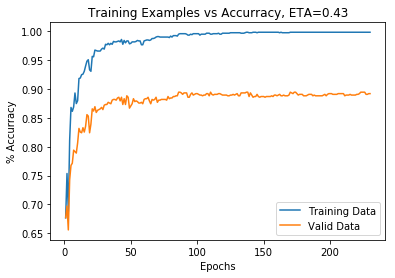

In [17]:
plt.plot(range(1, len(eta_textModel.train_history)+1), eta_textModel.train_history, label='Training Data')
plt.plot(range(1, len(eta_textModel.valid_history)+1), eta_textModel.valid_history, label='Valid Data')
plt.ylabel('% Accurracy')
plt.xlabel('Epochs')
plt.title('Training Examples vs Accurracy, ETA=0.43')
plt.legend()
plt.show()

**Part E**: Once you've found a reasonable learning rate, experiment with the regularization strength.  Show plots of accuracy over the training process for a few different values of `lam`.  Which seems to work the best-ish and why? 

**Hint**: For this type of text data, you'll want to look at very small values of `lam` (like `lam=1e-3` or maybe even smaller). 

Report your final accuracy on the training and validation sets after you've tuned your model in **Parts D** and **E**. 

In [20]:
textModel2 = LogReg(X_train, y_train, X_valid, y_valid)
textModel2.train(eta=0.43, lam=0.1e-6, num_epochs=10)
train_acc2 = textModel2.accuracy(X_train, y_train)
valid_acc2 = textModel2.accuracy(X_valid, y_valid)

print('Training Accuracy ' + str(train_acc2*100) + '% and Valid Accuracy: ' + str(valid_acc2*100) +'%')

Training Accuracy 99.83291562238931% and Valid Accuracy: 91.4572864321608%


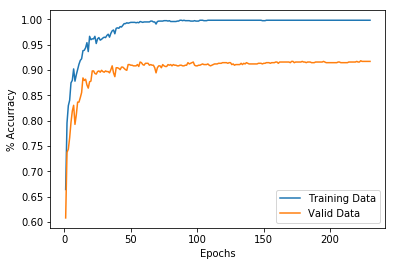

In [21]:
plt.plot(range(1, len(textModel2.train_history)+1), textModel2.train_history, label='Training Data')
plt.plot(range(1, len(textModel2.valid_history)+1), textModel2.valid_history, label='Valid Data')
plt.ylabel('% Accurracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Part F**: Finally, go back to your LogReg class and complete the `best_text_features` function to print the 10 best predictive words for each class.  Show your results here and also **briefly** explain mathematically how you arrived at them.  Do they seem to make sense given what you know about baseball and hockey? 

In [14]:
bestWords = LogReg(X_train, y_train, X_valid, y_valid)
bestWords.train(eta=0.43, lam=0.1e-6, num_epochs=10)
bestWords.best_text_features(vocab)


best words for class 0
----------------------
runs
morris
phillies
nl
pitching
cubs
baseball
stadium
hall
individuals

best words for class 1
----------------------
playoff
goal
question
islanders
stanley
ny
pts
period
nhl
hockey


###### Since our betas represent our learned weights as we train over the data, we know that our heighest beta values correlate to how strong that word is against the prediction of it being $y=1$ or correlated with Hockey. We also know that our smallest beta values correlate to how strong words are against being correlated to Baseball or $y=0$